In [1]:
import matplotlib.pyplot as plt
import cv2
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import pandas as pd
import time
from pathlib import Path
from PIL import Image
import numpy as np
import io
import IPython

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(img)
    return fig, ax


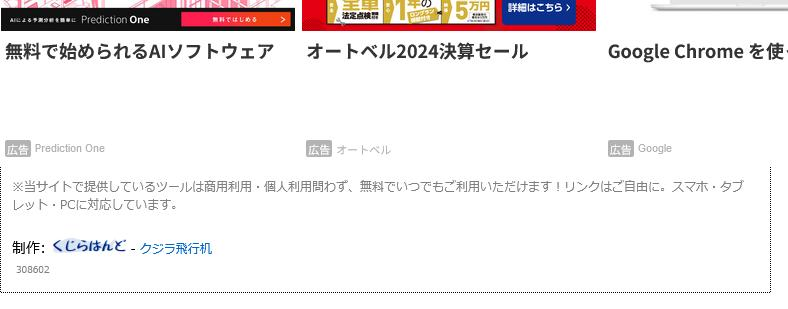

In [2]:
driver = webdriver.Firefox()
# driver.get('https://www.google.co.jp/')
driver.get('https://kujirahand.com/web-tools/Clock.php')

# 全画面でchromeを開く
# driver.fullscreen_window()
# 最大ウィンドウでchromeを開く
# driver.maximize_window()

# ウィンドウサイズを指定
driver.set_window_size(800, 400) # width, height
# ウィンドウ位置を指定
driver.set_window_position(0, 0)
# 拡大率を変更
driver.execute_script("document.body.style.zoom='200%'")

while True:
    try:
        data = driver.get_screenshot_as_png()
        screen_np_img = np.asarray(Image.open(io.BytesIO(data)).convert('RGB')) # RGB

        f = io.BytesIO()
        Image.fromarray(screen_np_img).save(f, "jpeg")
        IPython.display.display(IPython.display.Image(data=f.getvalue()))
        IPython.display.clear_output(wait=True)
    
    except:
        break

# ブラウザを閉じる
driver.quit()